In [139]:
# IMPORTANDO AS BIBLIOTECAS
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data = pd.DataFrame ({
    "pH": [3.0, 5.5, 2.5, 7.0, 4.0, 6.5, 3.5, 6.0, 2.0, 7.5, 4.5, 5.0, 2.8, 8.0],
    'Concentração': ['Concentrada', 'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 
                     'Diluída', 'Concentrada', 'Diluída', 'Concentrada', 'Diluída', 
                     'Concentrada', 'Diluída', 'Concentrada', 'Diluída'],
    "Cheiro": ['Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro',
               'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro',
               'Com Cheiro', 'Sem Cheiro', 'Com Cheiro', 'Sem Cheiro'],
    "Classe": ['Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica',
               'Ácida', 'Básica', 'Ácida', 'Básica', 'Ácida', 'Básica']
})

In [141]:
data['Concentração']=data['Concentração'].map({'Concentrada':0,'Diluída':1})
data['Cheiro']=data['Cheiro'].map({'Com Cheiro':2,'Sem Cheiro':3})
 

In [142]:
X = data [['pH', 'Concentração', 'Cheiro']]
y = data['Classe']


In [143]:
X

,pH,Concentração,Cheiro
0,3.0,0,2
1,5.5,1,3
2,2.5,0,2
3,7.0,1,3
4,4.0,0,2
5,6.5,1,3
6,3.5,0,2
7,6.0,1,3
8,2.0,0,2
9,7.5,1,3


In [144]:
y

0      Ácida
1     Básica
2      Ácida
3     Básica
4      Ácida
5     Básica
6      Ácida
7     Básica
8      Ácida
9     Básica
10     Ácida
11    Básica
12     Ácida
13    Básica
Name: Classe, dtype: object

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)


In [146]:
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)


SVC(kernel='linear')

In [147]:
# FAZENDO AS PREDIÇÕES
yprev = modelo.predict(X_test)

In [148]:
yprev

array(['Básica', 'Básica', 'Ácida', 'Ácida', 'Básica'], dtype=object)

In [149]:
X_test

,pH,Concentração,Cheiro
9,7.5,1,3
11,5.0,1,3
0,3.0,0,2
12,2.8,0,2
5,6.5,1,3


In [150]:
data.head(14)

,pH,Concentração,Cheiro,Classe
0,3.0,0,2,Ácida
1,5.5,1,3,Básica
2,2.5,0,2,Ácida
3,7.0,1,3,Básica
4,4.0,0,2,Ácida
5,6.5,1,3,Básica
6,3.5,0,2,Ácida
7,6.0,1,3,Básica
8,2.0,0,2,Ácida
9,7.5,1,3,Básica


In [151]:
# CALCULO DAS METRICAS DO ALGORITMO DE MACHINE LEARNING
# ACURACIA = VP/ VP+FP+VN
acc = accuracy_score(yprev,y_test)
acc

1.0

In [152]:
# CLASSFICATION REPORT
cr = classification_report(yprev, y_test)
print(cr)

              precision    recall  f1-score   support

      Básica       1.00      1.00      1.00         3
       Ácida       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



In [153]:
# MATRIZ DE CONFUSÃO
cm = confusion_matrix(yprev, y_test)
print(cm)

[[3 0]
 [0 2]]


Text(47.25, 0.5, 'Real')

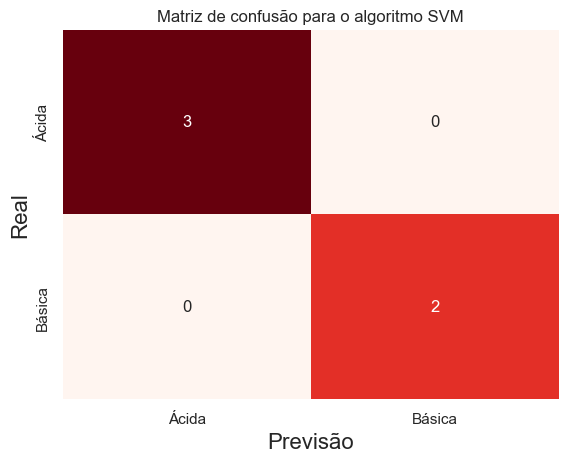

In [154]:
sns.heatmap(cm,annot=True, cmap='Reds', cbar=False,
            xticklabels=['Ácida', 'Básica'], 
            yticklabels=['Ácida','Básica'])    
                         
plt.title('Matriz de confusão para o algoritmo SVM')
plt.xlabel('Previsão', fontsize=16)
plt.ylabel('Real', fontsize=16)

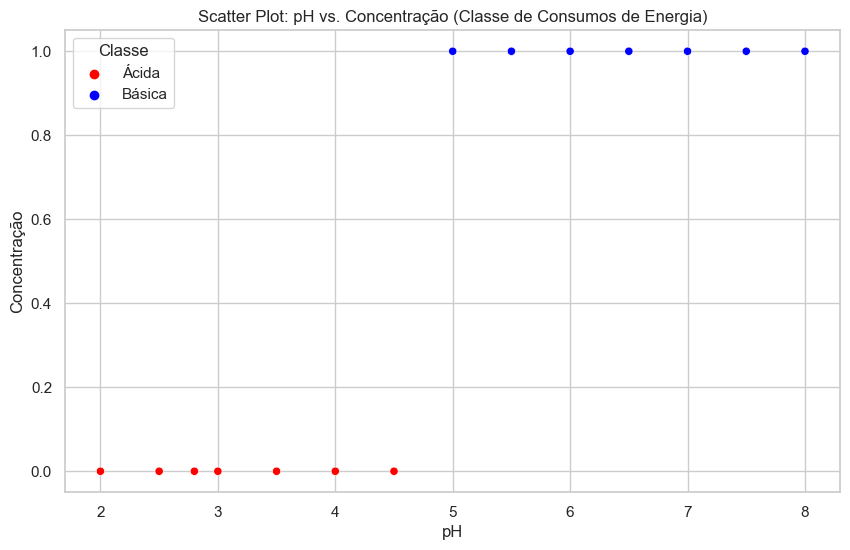

In [155]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {"Ácida": "red", "Básica": "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH', y='Concentração', hue='Classe', data=data, palette= palette)

# Personalizando o gráfico
plt.title('Scatter Plot: pH vs. Concentração (Classe de Consumos de Energia)')
plt.xlabel('pH')
plt.ylabel('Concentração')

# Mostrando o gráfico
plt.legend(title='Classe')
plt.show()  